# Elementary Probability and Linear Algebra Exercises

$\newcommand{\dotprod}[2]{\left\langle #1, #2 \right\rangle}$
$\newcommand{\onevec}{\mathbb{1}}$
Setting up the environment (Please run this cell to enable LaTeX macros)

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

%matplotlib inline

# Part 1: Probability
## 1A: Basic Rules
1. State the sum rule of probability.
- State Bayes' rule.
- Write the probability that $x\in\mathcal{S}$ where $x\sim X$ is a continuous random variable, in terms of the probability density function $f_X(x)$.
- Relate the probability density function to the cumulative distribution function $F_X(x)$.

### <span style="color:blue">Answer</span>

$1.$ Let $(\Omega, \mathcal{F}, \mathbf{P})$ be a probability space. Suppose $I$ is a countable index set and $\{ B_i\}_{i \in I}$ is a set of pairwise disjoint events such that the union $ \displaystyle \cup_{i\in I} B_i = \Omega \ .$ Then for any event $A\in \mathcal{F},$ we have 

$$ \mathbf{P}(A) = \sum_{i\in I} \mathbf{P}( A \cap B_i) = \sum_{i\in I} \mathbf{P}(A \ | \ B_i) \ \mathbf{P}(B_i)$$

$2.$ Let $(\Omega, \mathcal{F}, \mathbf{P})$ be a probability space. Let $A,B \in \mathcal{F}$ be events such that $\mathbf{P}(B) \neq 0.$ Then Bayes' theorem states that 

$$ \mathbf{P}(A \ | \ B) = \dfrac{ \mathbf{P}(B \ | \ A) \ \mathbf{P}(A) }{ \mathbf{P}(B) }$$

$3.$ For any subset $B\subseteq A$, we can define an indicator function $ \mathbf{1}_B : A \to \mathbb{R}$ by 

$$\mathbf{1}_B(x) := \begin{cases} 
      1 & x\in B \\
      0 & x\notin B 
   \end{cases} $$

A set $B \subseteq \mathbb{R}$ is (Lebesgue) measurable if and only if $\mathbf{1}_B$ is a measurable function. 

The PDF $f_X(x)$ is a measurable function (by definition), and products of measurable functions are measurable. So for any measurable subset $\mathcal{S} \subseteq \mathbb{R},$ the product function $\mathbf{1}_{\mathcal{S}} \ f_X$ is a measurable function and the following integral is well defined: $$ \mathbf{P}( x \in \mathcal{S} ) := \int_{\mathbb{R}} \mathbf{1}_{\mathcal{S}}(x) \ f_X(x)  \ dx   $$ 

$4.$ The PDF $f_X$ and CDF $F_X$ are related by the equation $$ F_X(x) = \int^x_{-\infty} f_X(t) \ dt $$



## 1B: Bayes' Rule (discrete random variables)
Let $X\in\{T,F\}$ be a binary random variable indicating whether a patient has a disease ($T$) or not ($F$). The (marginal or unconditional) probability of a patient having the disease is 0.01. Sick patients test positive for the disease 90% of the time. However, healthy patients test positive 5% of the time. 

1. What is the probability of having the disease if you test positive?

### <span style="color:blue">Answer</span>

Let $Y$ be a binary random variable indicating if a patient tested positive or negative. We want to compute $\mathbf{P}( X = T \ | Y = T).$ We are given that $\mathbf{P}(X=T) = 0.01, \ \mathbf{P}( Y = T \ | \ X = T) = 0.9$ and $\mathbf{P}( Y = T \ | \ X = F) = 0.05.$ By the sum rule we have

$$
\begin{aligned}
\mathbf{P}(Y = T) &= \mathbf{P}(Y = T \ | \ X = T) \ \mathbf{P}(X= T) + \mathbf{P}(Y = T \ | \ X = F) \ \mathbf{P}(X= F) \\
                  &= 0.9 \cdot 0.01 + 0.05 \cdot 0.99 \\
                  &= 0.0585
\end{aligned}
$$

Now by Bayes' theorem we get the result 

$$
\begin{aligned}
\mathbf{P}(X=T \ | \ Y = T) &= \dfrac{\mathbf{P}( Y=T \ | \ X = T) \ \mathbf{P}(X=T) }{\mathbf{P}(Y=T)} \\
                  &= \dfrac{0.9 \cdot 0.01}{0.0585} \\
                  &= \dfrac{2}{13} \\
                  &\approx 0.154
\end{aligned}
$$


## 1C: Bayes' Rule (continuous random variables)
A croupier samples a standard normal $X\sim \mathcal{N}(\mu=0,\sigma^2=1)$, and tosses a fair coin. If the coin lands on heads, she reveals to you the number $Z=X+1$. If it comes up tails she reveals $Z=X-1$. 

1. What is the probability that the number she reveals, $Z$, is greater than $a$, given that she tossed heads? 
- What is the probability she tossed heads, if the number she reveals to you is greater than $a$? 

Express the results in terms of the cumulative distribution function of the standard normal, that is $\Phi(a):=P(X<a)$.

### <span style="color:blue">Answer</span>

$1.$ Given that she tossed heads so that $Z = X + 1,$ we have $Z>a$ if and only if $ X > a-1,$ which happens with probability $1 - \Phi(a-1).$ So 

$$ \mathbf{P}( Z > a \ | \ \operatorname{Heads} ) = 1 - \Phi(a-1) $$

$2.$ By similar reasoning to the previous part, we have 

$$ \mathbf{P}( Z > a \ | \ \operatorname{Tails} ) = 1 - \Phi(a+1) $$
so by the sum rule we have 

$$
\begin{aligned}
\mathbf{P}(Z > a) &= \mathbf{P}( Z > a \ | \ \operatorname{Heads}) \ \mathbf{P}( \operatorname{Heads}) + \mathbf{P}( Z > a \ | \ \operatorname{Tails}) \ \mathbf{P}( \operatorname{Tails} ) \\ \\
&= (1 - \Phi(a-1)) \cdot \dfrac{1}{2} + (1 - \Phi(a+1)) \cdot \dfrac{1}{2}
\end{aligned}
$$

By Bayes' theorem, 

$$ 
\begin{aligned}
\mathbf{P}( \operatorname{Heads} \ | \ Z > a ) &= \dfrac{ \mathbf{P}( Z > a \ | \ \operatorname{Heads} ) \ \mathbf{P}(\operatorname{Heads}) }{ \mathbf{P}(Z>a)} \\ \\
&= \dfrac{ (1 - \Phi(a-1) ) \cdot \dfrac{1}{2} }{ (1 - \Phi(a-1)) \cdot \dfrac{1}{2} + (1 - \Phi(a+1)) \cdot \dfrac{1}{2} } \\ \\
&= \dfrac{ 1 - \Phi(a-1) }{2 - \Phi(a-1) - \Phi(a+1)}
\end{aligned}
$$

## 1D: Bayes Rule Simulation and Plot
1. Write a function ```theoretical_p``` which takes argument $a$ and returns the theoretical conditional probability derived previously, using ```scipy.stats.norm.cdf``` to compute $\Phi$
- Write a function ```monte_carlo_p``` which takes arguments $a$ and $n$, and which performs the croupier's sampling procedure $n$ times and returns an empirical estimate of the probability we computed above. Use the functions ```np.random.randn```, ```np.random.binomial``` and ```np.mean```. Avoid explicit loops, instead rely on the boolean index array feature of numpy.
- Plot the theoretical solution as a function of $a\in [-5,5]$ using the functions ```np.linspace``` to make a grid $1024$ of values for $a$.
- Overlay a plot of the empirical estimate with $n=500$. Label the two plots using the ```label``` argument to ```plt.plot``` along with ```plt.legend(loc='best')``` after plotting. Always label the axes in your plots. Add grid lines with ```plt.grid()```. Matplotlib accepts latex strings such as ```xlabel=r'$a$'```.

Think about the intuition behind the limiting values of the plot as $a\rightarrow-\infty$ and $a\rightarrow+\infty$.

### <span style="color:blue">Answer</span>

Our sample space of trails where $ Z > a $ comes from two mutually exclusive cases $ (X > a-1, \ \operatorname{Heads}) $ and $ (X > a+1, \ \operatorname{Tails}).$ The pdf $f(x) = \dfrac{1}{\sqrt{2\pi}} \exp(-x^2/2)$ decays very rapidly (more rapidly than $1/x^n$ for any $n$). Thus, as $a \to + \infty,$ we would expect that the vast proportion of the trails would come from the Heads case, because the vast majority of 

$$
\begin{aligned}
\mathbf{P}(X > a-1) &= \int^{\infty}_{a-1} f(x) dx \\
                    &= \int^{a+1}_{a-1} f(x) dx + \int_{a+1}^{\infty} f(x) dx \\
                    &= \int^{a+1}_{a-1} f(x) dx + \mathbf{P}(X > a+1)
\end{aligned}
$$ comes from the first term, and the $\mathbf{P}(X > a+1)$ term (the Tails case) is comparitively minor. So intuitively we would expect the functions on the graphs below to approach $1$ as $a \to + \infty.$ Similar reasoning leads us to expect that the graph will approach $0$ as $a \to -\infty.$

In [2]:
def theoretical_p(a):
    '''
    Takes a real number a as input and returns the probability that Z is greater than a.
    '''
    return (1-norm.cdf(a-1))/(2 - norm.cdf(a-1) - norm.cdf(a+1))

In [3]:
def monte_carlo_p(a,n):
    '''
    Takes a real number a and natural number n as inputs. 
    Runs n trials of croupiers calculation of Z.
    Isolates the trials where Z > a and returns the proportion of these where coin landed on heads.
    '''
    X = np.random.randn(n)
    Y = np.random.binomial(1, 1/2, n)
    Z = X + 2 * Y - 1
    
    if len(Y[Z>a]) > 0: # if simulation generates at least one sample, return probability estimate
        return np.mean(Y[Z>a]) 
    else:               # if no samples are generated, return NaN
        return np.nan

In [4]:
def plot_theo_vs_simulation(n):
    '''
    Takes a natural number n as input.
    Plots a graph of the closed form answer to 1C part 2 and the Monte Carlo approximation as
    a ranges from -5 to 5.
    
    Does not return anything.
    '''
    a_axis = np.linspace(-5, 5, num=1024)
    
    monte_carlo_vectorized = np.vectorize(monte_carlo_p)
    monte_carlo_points = monte_carlo_vectorized(a_axis, n)

    theoretical_vectorized = np.vectorize(theoretical_p)
    theoretical_points = theoretical_vectorized(a_axis)

    fig = plt.figure(figsize=(30,9))
    ax = fig.add_subplot(122)
    ax.plot(a_axis,monte_carlo_points,'bo', label='Monte Carlo')
    ax.plot(a_axis,theoretical_points,'r-', label='Theoretical', linewidth=4)
    ax.set_title('Theoretical vs Monte Carlo (%s trials)' % n)
    ax.legend(loc='best')
    ax.grid()
    ax.set_ylabel('$\mathbf{P}(\operatorname{Heads} \ | \ Z > a)$')
    ax.set_xlabel(r'$a$')

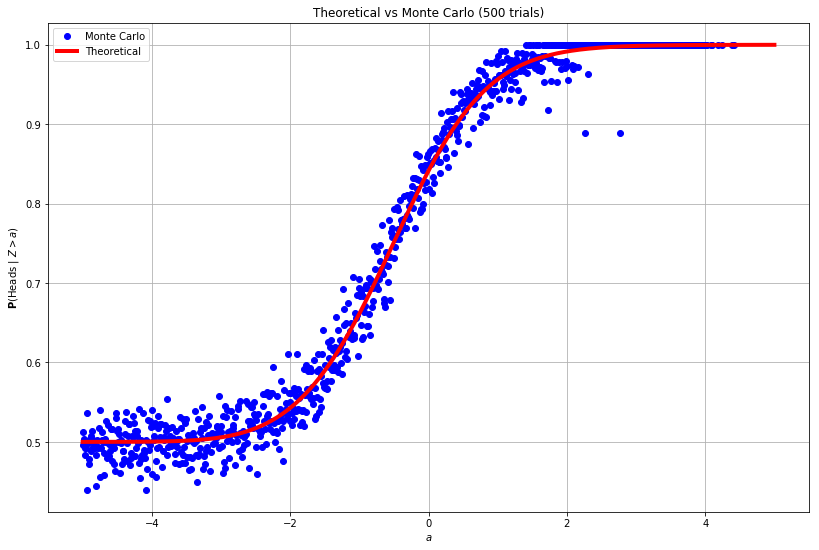

In [5]:
plot_theo_vs_simulation(500)

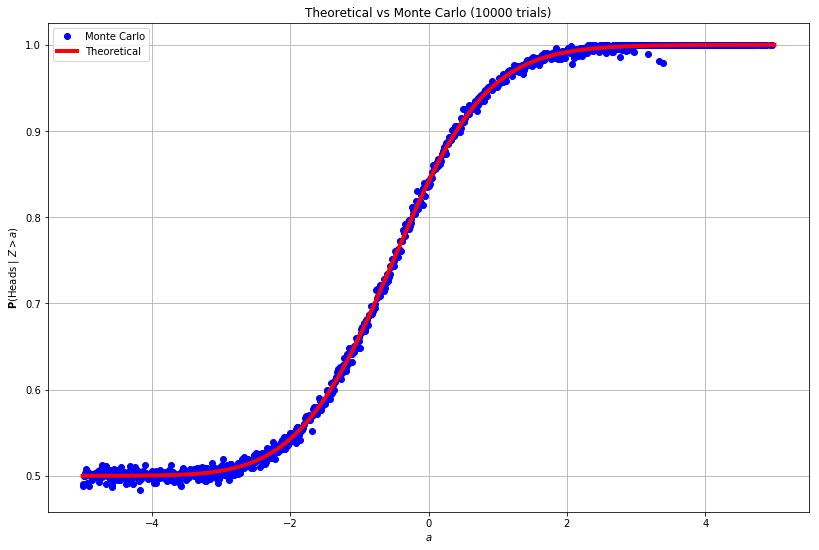

In [6]:
plot_theo_vs_simulation(10000)

# Part 2: Linear Algebra
## 2A: Linear Regression (theory)
Assume the deterministic model $y_i=\sum_{j=1}^d w_j x_{i,j}, i=1, 2, \ldots n$.
1. Write the model in matrix form using capital letters for matrices and bold lowercase for vectors, stating the dimensionality of the variables.
- Assume we observe corrupted targets $\hat{y}_i=y_i+\epsilon_i$, where $\epsilon_i$ represents unpredictable noise. Write the sum of squared errors $\sum_{i=1}^n (\sum_{j=1}^d w_j x_{i,j}-\hat{y}_i)^2$ in matrix form, and derive the vector $\mathbf{w}^\star$ which minimises it. You may wish to google <i>e.g.</i> "Sam Roweis matrix identities" and look at the section on "derivatives of scalar forms".

### <span style="color:blue">Answer</span>

$1.$ Let $\mathbf{y} = [ y_1, y_2, \ldots, y_n]^{\mathrm{T}},   \mathbf{w} = [w_1, w_2, \ldots, w_d]^{\mathrm{T}}$ be column vectors of dimensions $n$ and $d$ respectively. Let $X = [ x_{ij} ]_{n \times d}$ be a matrix of dimensions $n \times d.$ The above deterministic model then takes the form $ \mathbf{y} = X \mathbf{w}.$

$2.$ Let $\hat{\mathbf{y}} = [ \hat{y}_1, \hat{y}_2, \ldots, \hat{y}_n]^{\mathrm{T}}$ and $ \mathbf{\epsilon} = [ \epsilon_1, \epsilon_2, \ldots, \epsilon_n]^{\mathrm{T}},$ so that $ \hat{\mathbf{y}} = \mathbf{y} + \mathbf{\epsilon}.$ The sum of square errors is a function $f : \mathbb{R}^d \to \mathbb{R}$ given by 

$$f(\mathbf{w}) = (\hat{\mathbf{y}} - X \mathbf{w})^{\mathrm{T}}(\hat{\mathbf{y}} - X \mathbf{w}).$$ 

Taking the tranpose inside the brackets and distributing we get 

$$ f(\mathbf{w}) = \hat{ \mathbf{y} }^{\mathrm{T}}\hat{ \mathbf{y}} - \hat{ \mathbf{y}}^{\mathrm{T}} X \mathbf{w} - \mathbf{w}^{\mathrm{T}} X^{\mathrm{T}} \hat{ \mathbf{y}} + \mathbf{w}^{\mathrm{T}} X^{\mathrm{T}} X \mathbf{w}.$$ 

Now applying standard matrix derivative identities to the last three terms, we compute the direction derivative of $f$ at $\mathbf{w} $ in the direction $\mathbf{v}_1 \in \mathbb{R}^d :$ 

$$\mathcal{D}f(\mathbf{w},\mathbf{v}_1) = 2\mathbf{v}_1^{\mathrm{T}} ( X^{\mathrm{T}} X \mathbf{w} - X^{\mathrm{T}} \hat{\mathbf{y}}).$$

For a critical point $\mathbf{w}^{\star},$ we need $\mathcal{D}f(\mathbf{w}^{\star},\mathbf{v}_1)= 0$ in all directions $\mathbf{v}_1 \in \mathbb{R}^d,$ and in particular in the direction $\mathbf{v}_1 = X^{\mathrm{T}} X \mathbf{w}^{\star} - X^{\mathrm{T}} \hat{\mathbf{y}}.$ Then $\| X^{\mathrm{T}} X \mathbf{w}^{\star} - X^{\mathrm{T}} \hat{\mathbf{y}} \|^2 = 0$ which is true if and only if $X^{\mathrm{T}} X \mathbf{w}^{\star} = X^{\mathrm{T}} \hat{\mathbf{y}}.$ Suppose for now that $X$ has full column rank (all the columns are linearly independent) so that $X^{\mathrm{T}} X$ is invertible (see below*).

Then we have a unique critical point of $f:$ $$\mathbf{w}^{\star} = (X^{\mathrm{T}} X)^{-1}X^{\mathrm{T}} \hat{\mathbf{y}}.$$

To see what type, we compute the second direction derivative of $f$ at $\mathbf{w}$ in the directions $\mathbf{v}_1, \mathbf{v}_2 \in \mathbb{R}^d:$ 

$$ \mathcal{D}f(\mathbf{w},\mathbf{v}_1, \mathbf{v}_2) = 2 \mathbf{v}_1^{\mathrm{T}} X^{\mathrm{T}} X \mathbf{v}_2 = 2 ( X \mathbf{v}_1)^{\mathrm{T}} X \mathbf{v}_2 = 2 \langle X \mathbf{v}_1,X \mathbf{v}_2 \rangle .$$

In particular, we have $\mathcal{D}f(\mathbf{w}^{\star},\mathbf{v}_1, \mathbf{v}_1) = 2 \| X v_1 \|^2,$ which is $0$ if and only if $X v_1 = 0.$ Since $X$ has full column rank, $X v_1 = 0 $ if and only if $v_1 = 0,$ so we see $\mathcal{D}f(\mathbf{w}^{\star},\mathbf{v}_1, \mathbf{v}_1) \geq 0$ with equality if and only if $v_1 = 0.$ Since $\mathcal{D}f(\mathbf{w}^{\star},\mathbf{v}_1, \mathbf{v}_1)$ is strictly greater than zero in any direction $\mathbf{v}_1 \neq 0,$  $\mathbf{w}^{\star}$ is a local minimum, and since there are no other critical points, $\mathbf{w}^{\star}$ is the global minimum of $f.$

# ---------------------------------------------------------------------------------------------------------------

*Suppose $X$ has full column rank and that $X^{\mathrm{T}}X \mathbf{v} = 0$ for some vector $\mathbf{v} \in \mathbb{R}^d.$ Then

$$\| X \mathbf{v} \|^2 = (X \mathbf{v})^{\mathrm{T}}X \mathbf{v} = \mathbf{v}^{\mathrm{T}} X^{\mathrm{T}} X \mathbf{v} = \mathbf{v} \cdot \mathbf{0} = 0.$$

so $X \mathbf{v} = 0,$ and since $X$ has full column rank we have $\mathbf{v} = 0.$ So $X^{\mathrm{T}}X \mathbf{v} = 0$ implies $\mathbf{v} = 0$ i.e. $X^{\mathrm{T}}X$ is an injection. A square matrix is injective if and only if it is bijective (i.e. inveritble), so $X^{\mathrm{T}}X$ is invertible. 

The assumption is a very reasonable one to make in our context. If $X$ does not have full column rank, then there is some linear relation between the features that we have not yet detected. We can find a feature that is a linear combination of the other features, then delete that feature from our data $X$ (we can still determine it from the remaining features). We can do this recursively until $X$ has full column rank and then apply this regression theorem.

## 2B: Linear Regression (python)
1. Let $d=30, n=1000$ and generate $x_{i,j}, w_j$ and $\epsilon_i$ i.i.d. from $\mathcal{N}(0,1)$ using ```np.random.randn```.
- Imagine that the $w_j$ are unknown parameters, and compute them as a function of the $x_{i,j}$ and $\hat{y}_i$ using your least squares formula from the previous question. 
- Compare your estimated $\mathbf{w}^\star$ with the ground truth by printing them side by side.

### <span style="color:blue">Answer</span>

In [7]:
d, n = 30, 1000
X = np.random.randn(n, d)
w = np.random.randn(d, 1)
e = np.random.randn(n, 1)
y_hat = X @ w + e

In [8]:
# Using linalg.solve instead of explicitly calculating the closed form 
# as it is faster and more numerically stable than calculating (X.T @ X)^-1
w_star = np.linalg.solve(X.T @ X, X.T @ y_hat)

In [9]:
print (' ' * 5, 'w', ' ' * 17, "w*")
[print( '{}       {}'.format(w[i], w_star[i]) ) for i in range(len(w))]  
print ("\nRoot Mean Square Error: ", np.linalg.norm(w-w_star)/len(w-w_star)**.5)

      w                   w*
[1.44914577]       [1.42834959]
[-1.04547393]       [-1.01102473]
[-0.01771039]       [-0.01018953]
[0.30517283]       [0.34065352]
[0.91084502]       [0.86812073]
[0.51164878]       [0.51684882]
[-1.14631946]       [-1.14636966]
[0.42656838]       [0.42901037]
[-0.35786242]       [-0.36076285]
[0.58914336]       [0.55902061]
[0.78435164]       [0.78286744]
[-0.63307912]       [-0.62214443]
[-1.19779108]       [-1.23120982]
[-2.44296815]       [-2.412993]
[-0.0153996]       [-0.03084814]
[-0.00458436]       [0.02536242]
[-0.28024837]       [-0.30988322]
[-2.91894244]       [-2.91950095]
[0.08025351]       [0.13734093]
[-0.48422134]       [-0.48811892]
[-1.89463536]       [-1.87649685]
[-2.52781397]       [-2.54042072]
[-0.33567448]       [-0.35564556]
[0.24389471]       [0.24250789]
[-0.37107472]       [-0.33721182]
[0.20794718]       [0.211652]
[-0.44333323]       [-0.49908972]
[-0.92090214]       [-0.92125925]
[-0.35977887]       [-0.33483792]
[0.23043575